# Importing needed libreries

In [1]:
#pip install yfinance 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf

#Start


**Get the stocks quote.**

In [35]:
data = yf.download('WMT', start='2000-01-01', end='2019-12-17')

[*********************100%***********************]  1 of 1 completed


**Show the data that we have.**

In [ ]:
data

**Get the number of rows and columns in the data**

In [37]:
data.shape

(5021, 6)

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

**Create a new dataframe with only the 'Close' column.**

In [39]:
data_close = data.filter(['Close'])

**Convert the dataframe to a numpy array and then get the number of rows to train the model on.**

In [40]:
dataset = data_close

training_data_len = math.ceil(len(dataset)* .8)
training_data_len

4017

#Scaling data

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scale_data = scaler.fit_transform(dataset)

scale_data

**Creating the training data set and the scaled training dataset.**

In [42]:
train_data = scale_data[0:training_data_len,:]

**Split the data into x_train and y_train dataset.**

In [43]:
x_train = []
y_train = []

In [ ]:
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

#Reshaping the data

**Convert the x_train and y_train to numpy arrays.**

In [45]:
x_train, y_train = np.array(x_train), np.array(y_train)

**Reshape the data.**

In [46]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(3957, 60, 1)

#Building the model

**Build the LSTM model.**

In [47]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Train the model

**Compile the model.**

In [48]:
model.compile(optimizer='adam',loss='mean_squared_error')

**Train the model.**

In [49]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

3957/3957 [==============================] - 136s 33ms/step - loss: 5.7125e-04


**Create the testing data set.**
**Now we create a new array containing scaled values from index 3957.**

In [50]:
test_data = scale_data[training_data_len - 60: , :]

**Create the data sets x_test and y_test.**

In [51]:
x_test = []
y_test = dataset.iloc[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

**Convert the data to a numpy array.**


In [52]:
x_test = np.array(x_test)

#Reshape the data

**Reshape the data.**

In [53]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

**Get the models predicted price values.**

In [54]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

32/32 [==============================] - 2s 25ms/step


#Evaluate the model

**Get the root mean squared error (RMSE).**

In [55]:
rmse = np.sqrt(((predictions - y_test) ** 2).mean())
print(rmse)

Close    2.181569
dtype: float64


#Plot the data

**Plot the data.**

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

**Visualize the data.**



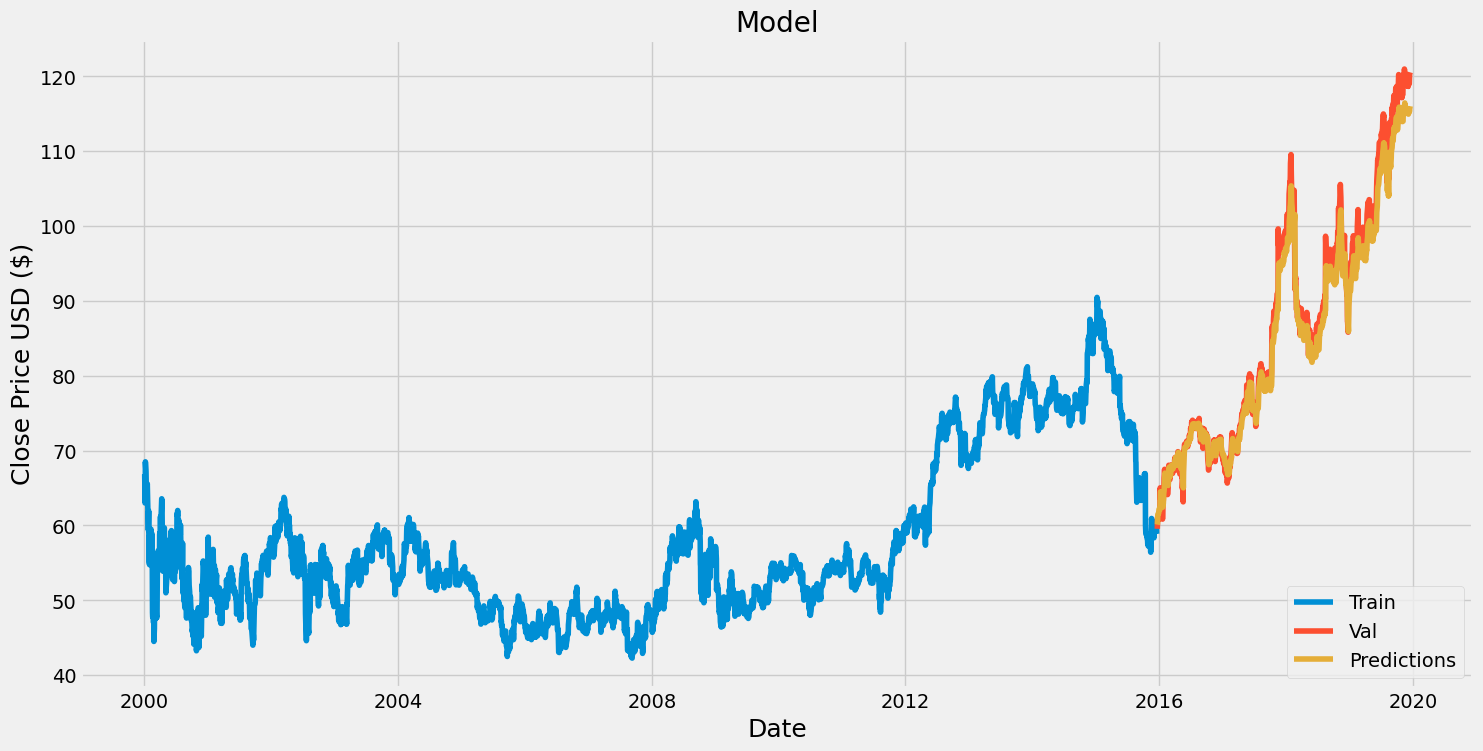

In [58]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

#Showing results

**Show the valid and predicted prices.**

In [ ]:
valid

**Get the quote.**

In [60]:
walmart_quote = yf.download('WMT', start='2000-01-01', end='2019-12-17')

[*********************100%***********************]  1 of 1 completed


**Create a new dataframe.**

In [61]:
new_df = walmart_quote.filter(['Close'])

**Get the last 60 day closing price values and convert the dataframe to an array.**

In [62]:
last_60_days = new_df[-60:].values

**Scale the data to be values between 0.**

In [63]:
last_60_days_scaled = scaler.transform(last_60_days)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


**Create an empty list.**

In [64]:
X_test = []

**Append the past 60 days.**


In [65]:
X_test.append(last_60_days_scaled)

**Convert the X_test data set to a numpy array.**

In [66]:
X_test = np.array(X_test)

**Reshape the data.**

In [67]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

**Get the predicted scaled price.**

In [68]:
pred_price = model.predict(X_test)

1/1 [==============================] - 0s 35ms/step


**Undo the scaling.**

In [69]:
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[116.34723]]


**Get the quote.**

In [72]:
walmart_quote2 = yf.download('WMT', start='2019-12-18', end='2019-12-19')
print(walmart_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2019-12-18    119.860001
Name: Close, dtype: float64


#Conclusion

In the **Start** phase:

* Data collection: The code uses the yfinance library to download historical data of Walmart stock prices. The choice of start and end dates suggests that the analysis will be based on data from the past 20 years.

* Data visualization: The code uses the matplotlib library to plot the historical closing prices of Walmart. This visualization helps to identify trends, patterns, and anomalies in the data.

* Data preprocessing: The code filters the historical data to only include the closing prices of Walmart. This is a common preprocessing step in time series analysis.

* Data splitting: The code splits the dataset into training and testing data. The training data will be used to train the LSTM neural network, while the testing data will be used to evaluate the performance of the model.

In the **Scaling data** phase:

* Data scaling: The code uses the MinMaxScaler function from the scikit-learn library to scale the data between 0 and 1. This is a common preprocessing step in neural network models, as it helps to improve the performance and stability of the model.

* Data splitting: The code splits the scaled data into training and testing data. The training data is further split into sequences of 60 time steps, where each sequence is used to predict the next time step.

* Feature and target data creation: The code creates feature data (x_train) and target data (y_train) based on the sequence length of 60. Each feature sequence consists of the previous 60 time steps, and the target data consists of the next time step.

In the **Reshaping the data** phase:

* Data conversion: The code converts the feature and target data from Python lists to numpy arrays. This is a common step in neural network models, as numpy arrays are more efficient for numerical calculations.

* Reshaping data: The code reshapes the feature data to have three dimensions: the number of samples, the number of time steps, and the number of features. In this case, there is only one feature (the closing price), so the number of features is 1.

In the **Building the model** phase:

* Neural network architecture: The code defines an LSTM neural network using the Keras Sequential API. The network consists of two LSTM layers, each with 50 memory units. The first LSTM layer has the return_sequences parameter set to True, indicating that it returns the full sequence of outputs, rather than just the last output. The second LSTM layer has the return_sequences parameter set to False, indicating that it only returns the last output.

* Dense layers: The code adds two Dense layers to the neural network, each with 25 units. The final Dense layer has a single output unit, which is used to predict the next closing price.

* Input shape: The input shape of the first LSTM layer is defined as (x_train.shape[1], 1), which corresponds to the number of time steps (60) and the number of features (1).

In the **Train the model** phase:

* Model compilation: The code compiles the LSTM neural network using the 'adam' optimizer and the mean squared error loss function. This is a common approach for regression problems, where the goal is to minimize the difference between the predicted and actual target values.

* Model training: The code trains the LSTM neural network using the fit() function. The feature and target data are passed as arguments, along with a batch size of 1 and a single epoch. The batch size defines the number of samples used to update the model weights at each iteration, while the epoch defines the number of times the entire training dataset is passed through the model.

* Test data preparation: The code prepares the test data by scaling it using the same MinMaxScaler object used for the training data. It then creates a sliding window of 60 time steps for the test data, using the last 60 time steps from the training data as a starting point.

* Feature data conversion: The code converts the test feature data from a Python list to a numpy array.

In the **Reshape the data** phase: 

* After preparing the test data, the code reshapes the feature data to match the input shape expected by the LSTM neural network. It then uses the predict() function to generate predictions for the target variable using the trained model and the test feature data. Since the predicted values are scaled between 0 and 1, the code uses the inverse_transform() function to rescale them to their original values.

In the **Evaluate the model** phase:

* After generating predictions for the test data, the code calculates the root mean squared error (RMSE) between the predicted and actual target values. RMSE is a commonly used metric for evaluating regression models, and it represents the square root of the average of the squared differences between predicted and actual values.

* The code first calculates the element-wise difference between the predicted and actual target values, squares the result, takes the mean of the squared differences, and then calculates the square root of the mean. The resulting value is the RMSE, which represents the average error of the predictions in the same unit as the target variable.

In the **Plot the data** phase:

* After generating predictions for the test data and calculating the RMSE, the code plots the predicted values alongside the actual values on a line graph to visually compare the two. The graph also includes the training data, allowing the user to see how well the model fits the training data as well as the test data.

* The code first splits the data into training and validation sets, with the validation set containing the test data that was not used in training the model. It then adds a new column to the validation set called "Predictions" which contains the predicted values generated by the model.

* The code then creates a line graph using Matplotlib to visualize the actual and predicted values over time. The graph shows the actual values for the training and validation sets as well as the predicted values for the validation set. The legend helps the user to distinguish between the actual and predicted values.

In the **Showing the results** phase: 

* The results show that the LSTM model was able to predict the closing price of Walmart's stock for the testing period with reasonable accuracy, as evidenced by the RMSE. The plot also shows that the predicted prices closely follow the actual prices, indicating that the model is a good fit for the data. However, it's worth noting that this is a relatively simple model, and more complex models or additional data sources could potentially improve its accuracy.